In [56]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn

In [57]:
torch.cuda.is_available()


True

In [58]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


In [59]:
#Splitting data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [60]:
def plot_predictions(train_data = X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_labels,c='g', s=4,label="Testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label = "Predictions")
    plt.show()

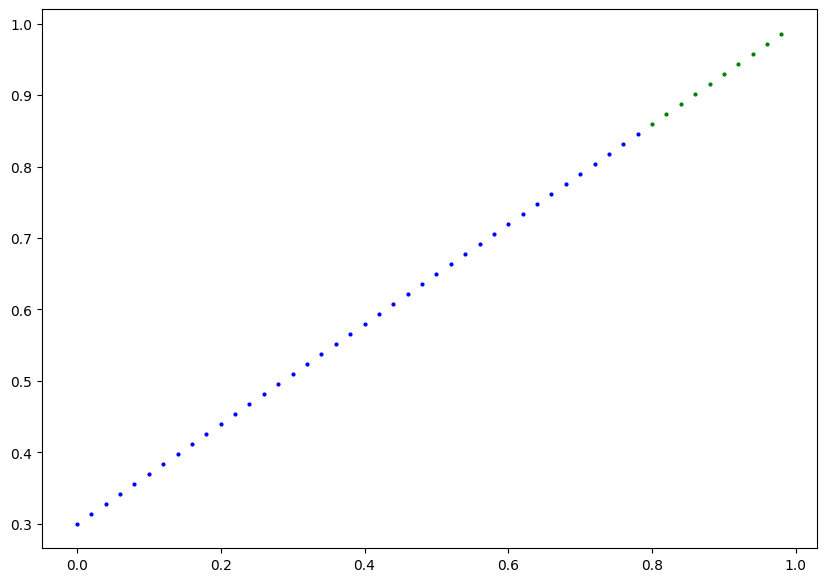

In [61]:
plot_predictions()

In [121]:
#build model
### model building essentials: torch.nn,torch.nn.Parameter,torch.nn.Module,torch.optim,torch.utils.data.Dataset/DataLoader
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x + self.bias

                
    

In [122]:
torch.manual_seed(42)

model0 = LinearRegression()
# list(model0.parameters())
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [123]:

with torch.inference_mode(): #turns off gradient tracking
    y_preds = model0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [124]:
loss_fn = nn.L1Loss()
lr = 0.01
optimizer= torch.optim.SGD(params=model0.parameters(),lr=lr)
loss1 = []


In [125]:
epochs = 200
for i in range(epochs):
    model0.train() #train mode in pytorch set #sets all parameters to req_grad=True
    #1. Forward pass
    y_pred = model0(X_train)
    #2. Calculate loss
    loss = loss_fn(y_pred,y_train)
    loss1.append(loss)
    print(f"Loss: {loss}")
    
    optimizer.zero_grad() #required step 
    #3. Backpropagate
    loss.backward()
    #4. Step the optimizer
    optimizer.step()
    
model0.eval()
    

Loss: 0.31288138031959534
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.053148526698350906
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.0498228520154953
Loss: 0.04895269125699997
Loss: 0.04819351062178612
Loss: 0.047531817108392715
Loss: 0.04692792519927025
Loss: 0.046423316001

LinearRegression()

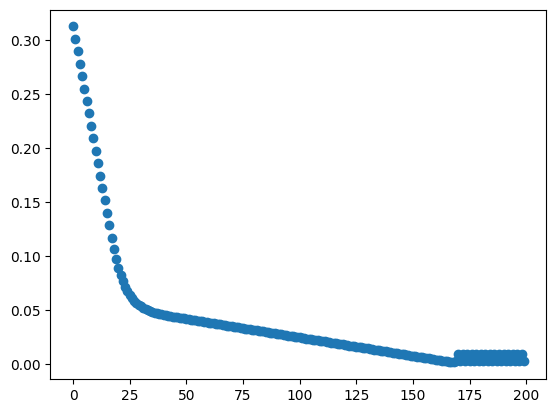

In [126]:
plt.scatter(range(epochs),[items.item() for items in loss1])
plt.show()

In [127]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

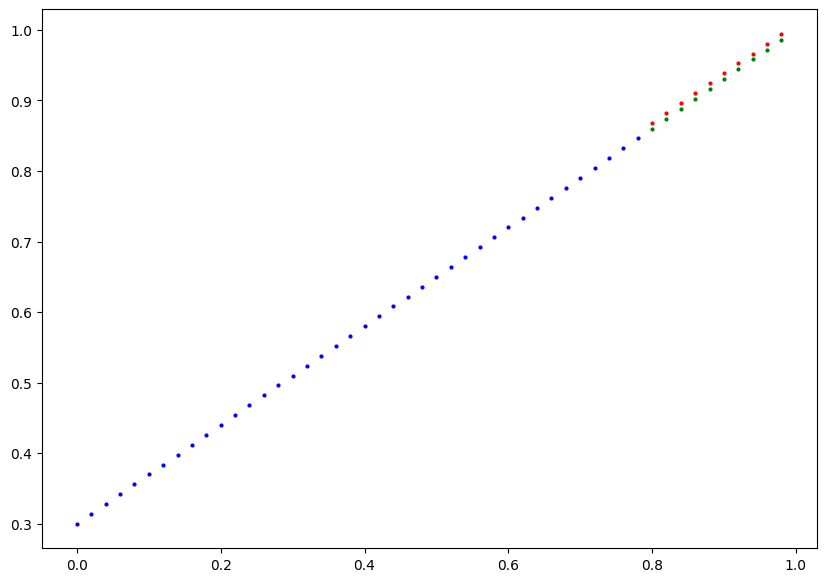

In [128]:
with torch.inference_mode(): #turns off gradient tracking
    y_preds = model0(X_test)
y_preds
plot_predictions(predictions=y_preds)

In [129]:
#Saving a model in pytorch
from pathlib import Path
Model_Path = Path('models')
Model_Path.mkdir(parents=True,exist_ok=True)
Model_Name = 'model0_lr.pth'
Model_savePath = Model_Path/Model_Name
torch.save(obj=model0.state_dict(),f=Model_savePath)

In [130]:
#Loading a saved state_dict of a model
loaded_model0 = LinearRegression()
loaded_model0.load_state_dict(torch.load(f='models/model0_lr.pth'))

<All keys matched successfully>

In [131]:
loaded_model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])